## 무선 청소기 모델별 비교 분석

In [1]:
import pandas as pd
data = pd.read_excel('../data/danawa_data.xlsx')
data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


In [2]:
top_list = data.sort_values(["흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0
165,핸디/스틱청소기,DIBEA,TSX-25000A,244470,45.0,250.0
143,핸디/스틱청소기,DIBEA,F20 울트라 맥스,236550,60.0,250.0
152,핸디/스틱청소기,아이룸,RS1,178000,40.0,250.0


In [3]:
top_list = data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0
109,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,931100,120.0,200.0
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0


In [4]:
# 평균값 정리
price_mean = data['가격'].mean()
suction_mean = data['흡입력'].mean()
use_time_mean = data['사용시간'].mean()
print("가격 평균값", price_mean)
print("흡입력 평균값", suction_mean)
print("사용시간 평균값", use_time_mean)

가격 평균값 296844.79253112036
흡입력 평균값 151.8294573643411
사용시간 평균값 43.38990825688074


In [5]:
# 가성비 좋은 제품 탐색
condition_data = data [
                (data['가격'] <= price_mean) & 
                (data['흡입력'] >= suction_mean) & 
                (data['사용시간'] >= use_time_mean)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
18,핸디/스틱청소기,DIBEA,M500 퀀텀,248640,50.0,250.0
42,핸디/스틱청소기,DIBEA,F20 프로,161970,50.0,220.0
73,핸디/스틱청소기,JDL,tech 타이푼 DV-889DC-X,137160,50.0,200.0
121,핸디/스틱청소기,샤오미,드리미 V9P,216720,60.0,200.0
124,핸디/스틱청소기,캐치웰,코드엑스,219000,60.0,220.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0


In [166]:
from matplotlib import font_manager, rc
import platform 
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')

#Rich output 에 대한 표현 방식
# Rich output: 도표와 같은 그림, 소리, 애니메이션 과 같은 결과물
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline

In [7]:
# 시각화를 위해 null data 정리 하기위해 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    241 non-null    object 
 1   회사명     241 non-null    object 
 2   제품      241 non-null    object 
 3   가격      241 non-null    int64  
 4   사용시간    218 non-null    float64
 5   흡입력     129 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [8]:
# null data 확인
data.isnull()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
236,False,False,False,False,False,False
237,False,False,False,False,True,True
238,False,False,False,False,False,True
239,False,False,False,False,False,False


In [9]:
data['흡입력'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237     True
238     True
239    False
240    False
Name: 흡입력, Length: 241, dtype: bool

In [10]:
# 결측값 없애기
chart_data = data.dropna(axis = 0)
chart_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


In [11]:
chart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    123 non-null    object 
 1   회사명     123 non-null    object 
 2   제품      123 non-null    object 
 3   가격      123 non-null    int64  
 4   사용시간    123 non-null    float64
 5   흡입력     123 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.7+ KB


In [12]:
# 흡입력, 사용시간의 최댓값/최솟값 정리
suction_max = chart_data['흡입력'].max()
suction_mean = chart_data['흡입력'].mean()
use_time_max = chart_data['사용시간'].max()
use_time_mean = chart_data['사용시간'].mean()

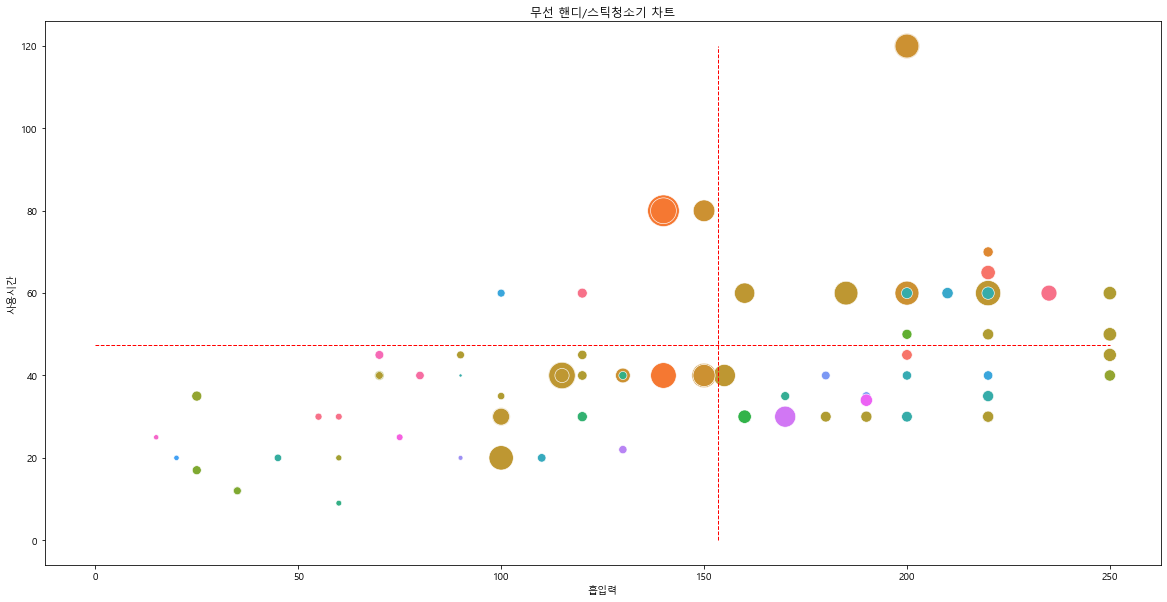

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 청소기 성능 시각화
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max], [use_time_mean, use_time_mean], 'r--', lw = 1 )
plt.plot([suction_mean, suction_mean], [0, use_time_max], 'r--', lw = 1 )
plt.show()

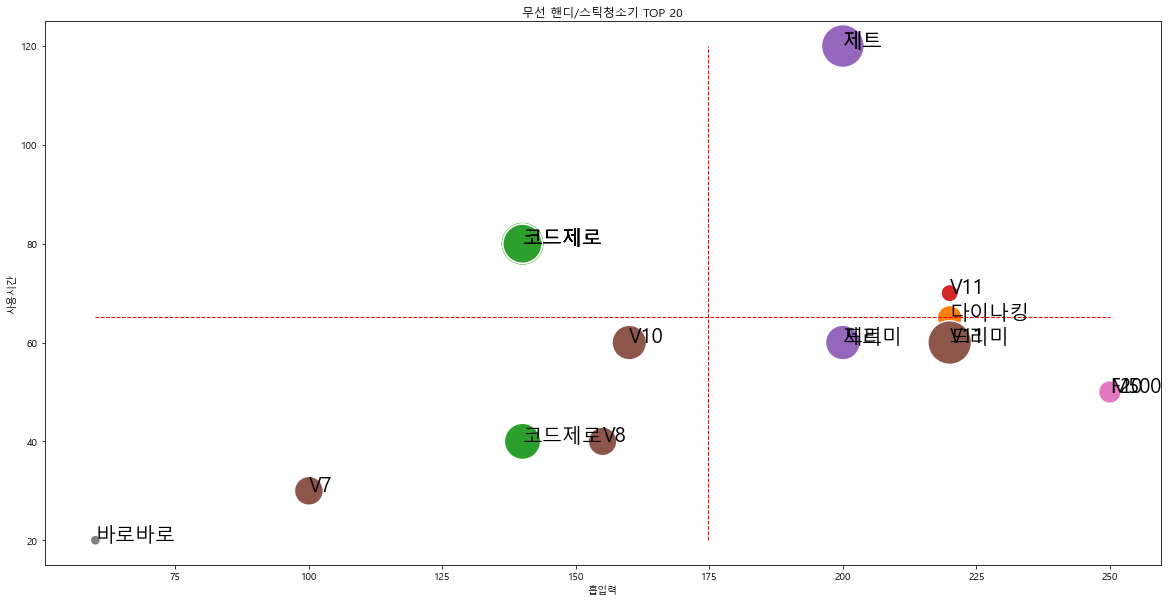

In [14]:
# 인기 제품 20개 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)
# 흡입력, 사용시간의 최댓값, 최솟값 구하기
suction_max = chart_data_selected['흡입력'].max()
suction_mean = chart_data_selected['흡입력'].mean()
use_time_max = chart_data_selected['사용시간'].max()
use_time_mean = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', 
                hue = chart_data_selected['회사명'], 
                data = chart_data_selected, sizes = (100, 2000),
                legend = False)
plt.plot([60, suction_max], [use_time_mean, use_time_mean], 'r--', lw = 1 )
plt.plot([suction_mean, suction_mean], [20, use_time_max], 'r--', lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()



## Selenium 사용하기

In [15]:
!pip install selenium

In [16]:
from selenium import webdriver
#chromedriver 저장 경로 지정
driver = webdriver.Chrome('C:\data\chromedriver')
driver.get('http://naver.com')

In [17]:
xpath='//*[@id="account"]'
driver.find_element_by_xpath(xpath).click()

In [18]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('YOUR_ID')

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('YOUR_PW')

driver.find_element_by_xpath('//*[@id="log.login"]').click()

## 서울 주유소 가격 정보 비교

In [19]:
from selenium import webdriver
driver = webdriver.Chrome('C:\data\chromedriver')
driver.get("http://www.opinet.co.kr")

In [20]:
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [21]:
# 서울 클릭을 위한 xpath 확인
area = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')

In [22]:
area.send_keys('서울')

In [23]:
# 구/데이터 입력을 위한 xpath 확인
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')

In [24]:
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [25]:
#value 속성을 이용하여 구 리스트 획득
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [26]:
#gu_names에서 리스트 첫번째 값 입력하여 테스트 진행
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [27]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [28]:
#엑셀 저장 버튼 클릭하여 엑셀 내용 저장 테스트
xpath = '''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [ ]:
import time
from tqdm import tqdm_notebook

# 반복문을 이용하여 모든 구 엑셀파일 다운로드 진행
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)# 데이터 획득 위한 지연 시간
    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    time.sleep(1)
    xpath = '''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    time.sleep(1)

In [91]:
import pandas as pd
from glob import glob

# station_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장
stations_files = glob('../../../../Downloads/지역*.xls')
stations_files
# concat 명령으로 합쳐본다.
tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 38
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      508 non-null    object
 1   상호      508 non-null    object
 2   주소      508 non-null    object
 3   상표      508 non-null    object
 4   전화번호    508 non-null    object
 5   셀프여부    508 non-null    object
 6   고급휘발유   508 non-null    object
 7   휘발유     508 non-null    object
 8   경유      508 non-null    object
 9   실내등유    508 non-null    object
dtypes: object(10)
memory usage: 43.7+ KB


In [92]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1791,1623,1413,-
1,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1625,1425,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1791,1633,1424,-
3,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1637,1439,-
4,서울특별시,대교주유소,서울 강남구 강남대로 640 (신사동),SK에너지,02-512-5521,N,1825,1645,1450,-


In [93]:
# 휘발유 데이터 저장.
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
'주소': station_raw['주소'],
'가격': station_raw['휘발유'],
'셀프': station_raw['셀프여부'],
'상표': station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1623,Y,SK에너지
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1625,Y,SK에너지
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1633,Y,현대오일뱅크
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1637,Y,GS칼텍스
4,대교주유소,서울 강남구 강남대로 640 (신사동),1645,N,SK에너지


In [94]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '강북구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [95]:
stations['가격'].unique() #가격에 '-'가 있음

array(['1623', '1625', '1633', '1637', '1645', '1648', '1655', '1683',
       '1685', '1698', '1719', '1723', '1735', '1737', '1739', '1749',
       '1770', '1774', '1788', '1794', '1808', '1810', '1816', '1877',
       '1967', '1988', '1991', '2026', '2058', '2075', '2085', '2088',
       '2089', '2138', '2225', '-', 1573, 1575, 1582, 1584, 1585, 1588,
       1589, 1635, 1645, 1648, 1649, 1663, '1585', '1595', '1597', '1599',
       '1605', '1634', '1658', '1669', '1678', 1609, 1624, 1628, 1629,
       1634, 1644, 1673, 1755, '1598', '1647', '1657', '1716', '1728',
       '1798', '1867', '1897', 1599, 1604, 1607, 1612, 1617, 1627, 1637,
       1638, 1542, 1613, 1619, 1623, 1625, 1636, 1639, 1647, 1679, 1690,
       1698, 1715, 1748, 1795, 1852, 1997, 1998, 2117, 1598, 1614, 1668,
       1678, 1687, 1696, 1729, 1759, 1848, 1889, 1895, 1898, 1578, 1587,
       1597, 1605, 1608, 1618, 1658, 1699, 1600, 1610, 1640, 1655, 1659,
       1665, 1858, 1565, 1595, 1837, 1853, 1643, 1683, 1688, 1

In [97]:
stations.reset_index(inplace = True)
del stations['index']

In [98]:
stations = stations[stations['가격'] != '-']
stations.shape

(494, 6)

In [99]:
stations['가격'] = [float(value) for value in stations['가격']]

In [100]:
# reset_index 이용하여 index 재정의
stations.reset_index(inplace=True)
del stations['index']# 기존 인덱스 삭제

In [101]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  494 non-null    object 
 1   주소         494 non-null    object 
 2   가격         494 non-null    float64
 3   셀프         494 non-null    object 
 4   상표         494 non-null    object 
 5   구          494 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.3+ KB


In [102]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

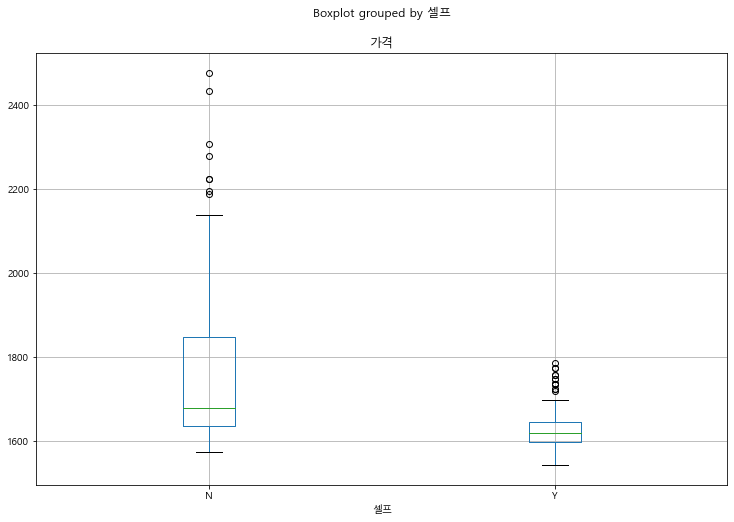

In [103]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

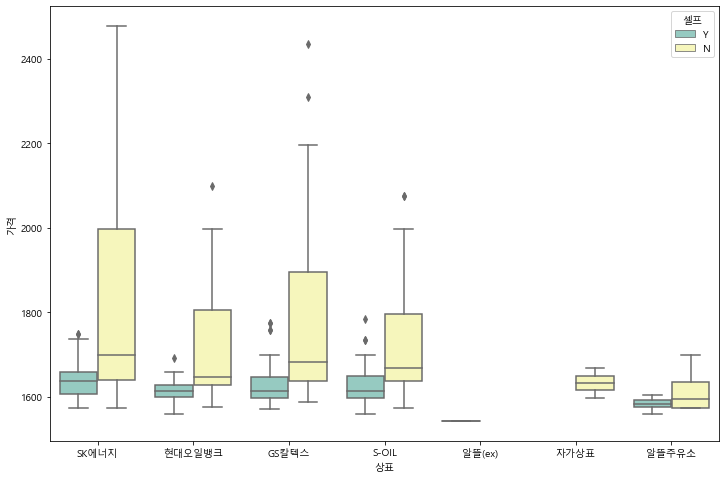

In [104]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

In [105]:
!pip install googlemaps

In [106]:
import googlemaps

gmaps_key = 'YOUR_KEY' # API설정할 때 얻은 key
gmaps = googlemaps.Client(key=gmaps_key)
gmaps.geocode('경남대학교', language='ko')

[{'address_components': [{'long_name': '７',
    'short_name': '７',
    'types': ['premise']},
   {'long_name': '경남대학로',
    'short_name': '경남대학로',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '마산합포구',
    'short_name': '마산합포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '창원시',
    'short_name': '창원시',
    'types': ['locality', 'political']},
   {'long_name': '경상남도',
    'short_name': '경상남도',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '631-260',
    'short_name': '631-260',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 경상남도 창원시 마산합포구 경남대학로 7',
  'geometry': {'location': {'lat': 35.18035, 'lng': 128.553385},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 35.18169898029149,
     'lng': 128.5547339802915},
    'southwest': {'lat': 35.1790010197085, 'lng':

In [107]:
!pip install folium

In [108]:
import folium
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map2 = folium.Map(location=[37.55,126.98],
tiles='Stamen Terrain', zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], 
tiles='Stamen Toner', zoom_start=15)
# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')
seoul_map2.save('./seoul2.html')
seoul_map2.save('./seoul2.html')

In [109]:
university_name=['경남대학교', '경상대학교', '창원대학교']
university_address = []
university_lat = []
university_lng = []
for name in university_name:
    tmp = gmaps.geocode(name, language='ko')
    university_address.append(tmp[0].get('formatted_address'))
    tmp_loc = tmp[0].get('geometry')
    university_lat.append(tmp_loc['location']['lat'])
    university_lng.append(tmp_loc['location']['lng'])
for address, lat, lng, name in zip(university_address, university_lat, university_lng, university_name):
    print('학교명:', name)
    print('주소: ', address)
    print('위도: ', str(lat), ' 경도:', str(lng))
    print('-' *70)

학교명: 경남대학교
주소:  대한민국 경상남도 창원시 마산합포구 경남대학로 7
위도:  35.18035  경도: 128.553385
----------------------------------------------------------------------
학교명: 경상대학교
주소:  대한민국 경상남도 진주시 가좌동 진주대로 501
위도:  35.1531629  경도: 128.0994469
----------------------------------------------------------------------
학교명: 창원대학교
주소:  대한민국 경상남도 창원시 의창구 봉림동 창원대학로 20
위도:  35.245595  경도: 128.691953
----------------------------------------------------------------------


In [110]:
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1828.888889
강동구,1714.437500
강북구,1591.461538
강서구,1635.909091
관악구,1655.866667


In [111]:

#서울시 구별 정보에 대해 지도로 표현
geo_path = '../data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
                data = gu_data,
                columns=[gu_data.index, '가격'],
                fill_color='PuRd', #PuRd, YlGnBu
                key_on='feature.id')
map

C:\Users\wlgns\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [112]:
m = folium.Map(
location=[35.1804486,128.5523014],
zoom_start=15,
)
university_name=['경남대학교', '경상대학교', '창원대학교']

for name in university_name:
    tmp = gmaps.geocode(name, language='ko')
    tmp_loc = tmp[0].get('geometry')
    folium.Marker(
    location=[tmp_loc['location']['lat'],tmp_loc['location']['lng']],
    popup=name,
    icon=folium.Icon(color='red',icon='star')
    ).add_to(m)
m

In [113]:
df = pd.read_excel('../data/서울지역 대학교 위치.xlsx')
df.set_index('학교명', inplace=True)
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98],
tiles='Stamen Terrain', 
zoom_start=12)
# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
# 지도보기
seoul_map

In [114]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
109,만남의광장주유소,서울 서초구 양재대로12길 73-71,1542.0,Y,알뜰(ex),서초구
260,도림주유소,서울 영등포구 도림로 343 (도림동),1559.0,Y,알뜰주유소,영등포구
261,영등포제일셀프주유소,서울 영등포구 가마산로 379,1559.0,Y,현대오일뱅크,영등포구
259,성락주유소,서울 영등포구 가마산로 414 (신길동),1559.0,Y,S-OIL,영등포구
217,현대주유소,서울 양천구 남부순환로 372 (신월동),1565.0,Y,S-OIL,양천구
334,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1572.0,Y,현대오일뱅크,강북구
335,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1572.0,Y,S-OIL,강북구
336,수유동주유소,서울 강북구 도봉로 395 (수유동),1572.0,Y,GS칼텍스,강북구
218,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1573.0,N,SK에너지,양천구
36,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1573.0,Y,SK에너지,도봉구


In [115]:
from tqdm import tqdm_notebook
lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
oil_price_top10['lat']=lat
oil_price_top10['lng']=lng
oil_price_top10

<ipython-input-115-cff85e376671>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
333,서남주유소,서울 중구 통일로 30,2478.0,N,SK에너지,중구,37.558348,126.972090
298,서계주유소,서울 용산구 청파로 367 (서계동),2435.0,N,GS칼텍스,용산구,37.552290,126.968935
332,필동주유소,서울 중구 퇴계로 196 (필동2가),2309.0,N,GS칼텍스,중구,37.560850,126.993653
331,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2279.0,N,SK에너지,중구,37.561648,126.997142
493,뉴서울(강남),서울 강남구 언주로 716,2225.0,N,SK에너지,강남구,37.517636,127.035756
35,뉴서울(강남),서울 강남구 언주로 716,2225.0,N,SK에너지,강남구,37.517636,127.035756
330,약수주유소,서울 중구 다산로 173,2196.0,N,GS칼텍스,중구,37.559009,127.012663
297,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2190.0,N,SK에너지,용산구,37.550179,126.972463
492,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2138.0,N,GS칼텍스,강남구,37.511513,127.047093
34,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2138.0,N,GS칼텍스,강남구,37.511513,127.047093


In [116]:
lat = []
lng = []
for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng
oil_price_bottom10

<ipython-input-116-f3c40f388e1b>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_bottom10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
109,만남의광장주유소,서울 서초구 양재대로12길 73-71,1542.0,Y,알뜰(ex),서초구,37.459906,127.042060
260,도림주유소,서울 영등포구 도림로 343 (도림동),1559.0,Y,알뜰주유소,영등포구,37.507656,126.900191
261,영등포제일셀프주유소,서울 영등포구 가마산로 379,1559.0,Y,현대오일뱅크,영등포구,37.502362,126.899452
259,성락주유소,서울 영등포구 가마산로 414 (신길동),1559.0,Y,S-OIL,영등포구,37.503750,126.902823
217,현대주유소,서울 양천구 남부순환로 372 (신월동),1565.0,Y,S-OIL,양천구,37.533811,126.829240
334,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1572.0,Y,현대오일뱅크,강북구,37.631582,127.017939
335,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1572.0,Y,S-OIL,강북구,37.640155,127.017203
336,수유동주유소,서울 강북구 도봉로 395 (수유동),1572.0,Y,GS칼텍스,강북구,37.642140,127.029568
218,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1573.0,N,SK에너지,양천구,37.536940,126.834278
36,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1573.0,Y,SK에너지,도봉구,37.645005,127.032098


In [119]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], 
        oil_price_top10['lng'][n]],
        radius=15, color='#CD3181',
        fill_color='#CD3181').add_to(map)
    for n in oil_price_bottom10.index:
        if pd.notnull(oil_price_bottom10['lat'][n]):
                folium.CircleMarker([oil_price_bottom10['lat'][n],
                oil_price_bottom10['lng'][n]],
                radius=15, color='#3186cc',
                fill_color='#3186cc').add_to(map)
map

## 서울시 구별 CCTV 현황 분석

In [121]:
import pandas as pd
CCTV=pd.read_csv('../data/CCTV.csv')
CCTV.rename(columns={'기관명':'구별'}, inplace=True)
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [129]:
pop_seoul=pd.read_excel('../data/population.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [130]:
# 필요한 데이터 선별
pop_seoul=pd.read_excel('../data/population.xls', header=2, usecols=(1,3,6,9,13))
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [132]:
#column명 변경
pop_seoul.columns=['구별','인구수','한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [137]:
CCTV['최근증가율']=(CCTV['2016년']+CCTV['2015년']+CCTV['2014년'])/(CCTV['2013년도 이전']) *100
CCTV.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [138]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [139]:
# 합계 삭제
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [140]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [141]:
# nan 삭제하기 위해 non 행 확인
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [142]:
# NaN 삭제
pop_seoul.drop([26], inplace=True)
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [143]:
pop_seoul['외국인비율']=(pop_seoul['외국인']/pop_seoul['인구수'])*100
pop_seoul['고령자비율']=(pop_seoul['고령자']/pop_seoul['인구수'])*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [147]:
# 계산 결과 각각 확인
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [148]:
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [149]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [150]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [151]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [152]:
result_data=pd.merge(CCTV,pop_seoul, on='구별')#구별 column으로 병합
result_data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [153]:
# 의미 없는 column 제거
result_data.drop(['2013년도 이전','2014년','2015년','2016년'], axis=1, inplace= True)
result_data.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [154]:
# 구별 column을 index로 설정
result_data.set_index('구별', inplace=True)
result_data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [155]:
# 전체 column 간 상관관계 분석
'''상관계수의 절대값이 클수록 두 데이터는 관계가 있음
ex) 상관계수의 절대값이 0.1 이하면 거의 무시, 0.3 이하면 약한
상관관계, 0.7 이하면 뚜렷한 상관관계'''
result_data.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


<AxesSubplot:>

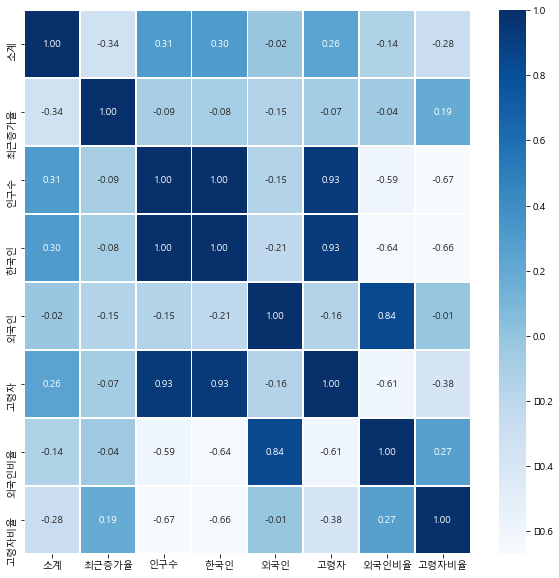

In [157]:
# 시각화

plt.figure(figsize=(10,10))
sns.heatmap(data = result_data.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

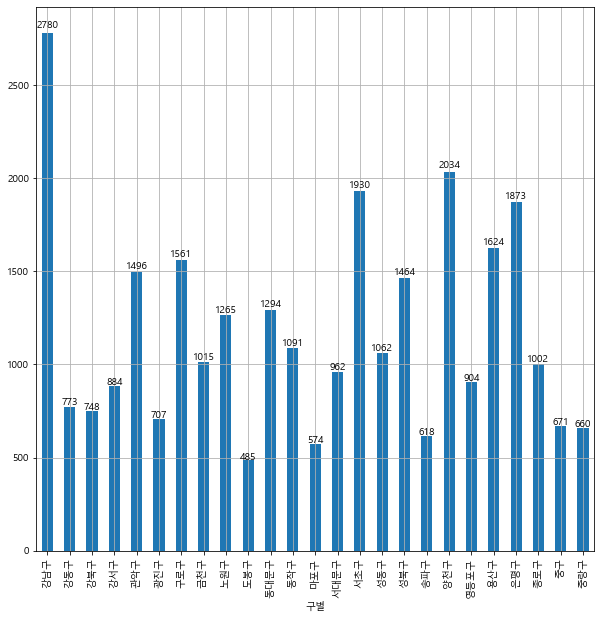

In [158]:
ax=result_data['소계'].plot(kind='bar', grid=True, figsize=(10, 10))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.text(left+width/2, height*1.01,"%d"%(height), ha='center')


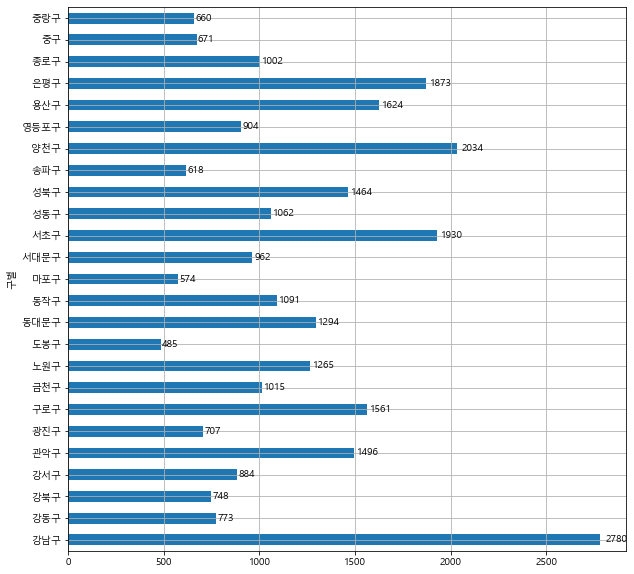

In [159]:
ax=result_data['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
ax.ylable='구별'
for p in ax.patches: #patches: 속성값들
    x, y, width, height = p.get_bbox().bounds # height = p.get_bbox().bounds:공식
    ax.text(width*1.01, y+height/2, "%.d"%(width), va='center')

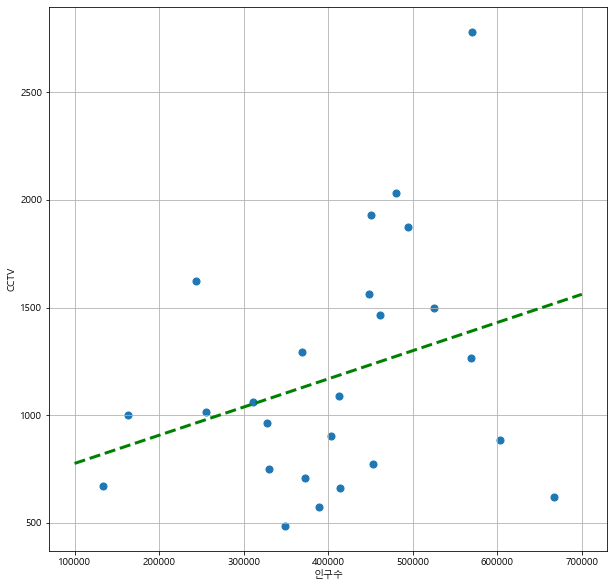

In [162]:
#polyfit 함수로 다항식의 계수 구하기
fp1=np.polyfit(result_data['인구수'],result_data['소계'],1) # 1차 방정식 계수 구하기
f1=np.poly1d(fp1) # 1차 방정식 만들기
fx=np.linspace(100000,700000,100)
plt.figure(figsize=(10,10))
plt.scatter(result_data['인구수'],result_data['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g') # 직선 그리기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [163]:
fp1=np.polyfit(result_data['인구수'], result_data['소계'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)
result_data['오차']=np.abs(result_data['소계']- f1(result_data['인구수']))
df_sort=result_data.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,659.231690


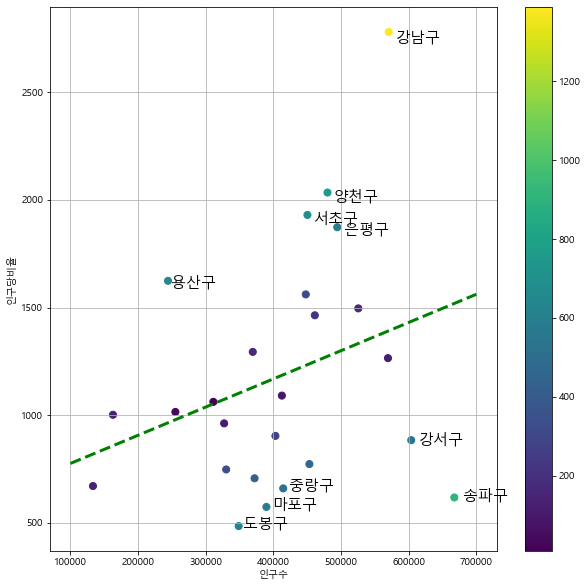

In [165]:
plt.figure(figsize=(10,10))
plt.scatter(result_data['인구수'],result_data['소계'],c=result_data['오차'], s=50)
plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g')
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()